<a href="https://colab.research.google.com/github/Shivani-Pathak/project/blob/main/Business_Developmentanalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
path = '/content/MyDrive/MyDrive/Colab Notebooks/Data Assignment.xlsx'
data = pd.read_excel(path)
#with open(path, 'rb') as f:
  #text = f.read()

Missing Values:
 Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64
Data Types:
 Date                          datetime64[ns]
No of Leads                          float64
Time Spent on LG (in mins)           float64
dtype: object


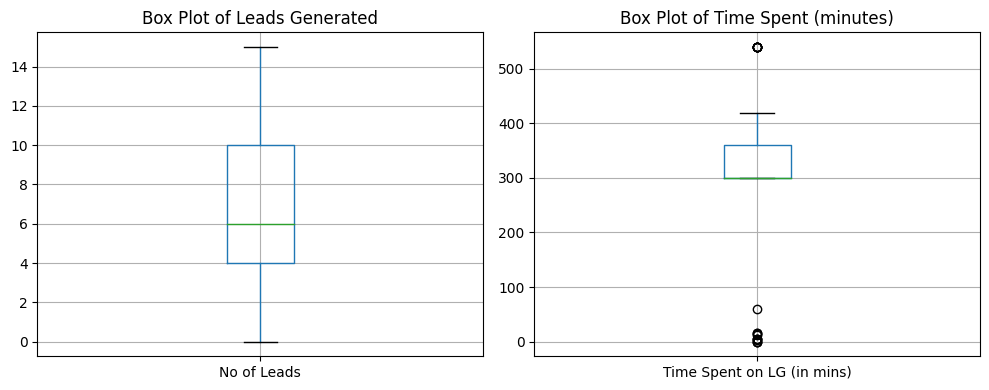

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Checking data types
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['No of Leads'] = pd.to_numeric(data['No of Leads'], errors='coerce')
data['Time Spent on LG (in mins)'] = pd.to_numeric(data['Time Spent on LG (in mins)'], errors='coerce')
print("Data Types:\n", data.dtypes)

# Checking for outliers using box plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data.boxplot(column='No of Leads')
plt.title('Box Plot of Leads Generated')
plt.subplot(1, 2, 2)
data.boxplot(column='Time Spent on LG (in mins)')
plt.title('Box Plot of Time Spent (minutes)')
plt.tight_layout()
plt.show()


The lines or points which are exceptionally far from the bulk of the data, those are potential outliers that should be further investigated.

Those can be removed so, that we can get a data which will correctly predict the future performances.


# KPI the key performance indicators

**KPI 1: Average Leads Generated per Day:**

This KPI measures the average number of leads generated by each employee per day. It provides insights into the daily performance of each employee.

Average Leads Generated per Day = (Total Leads Generated) / (Number of Days with Data)

**KPI 2: Average Time Spent per Day:**

This KPI measures the average amount of time spent on lead generation activities.It gives an idea of the daily effort put in by employees.

Average Time Spent per Day = (Total Time Spent) / (Number of Days with Data)

**KPI 3: Conversion Rate (Leads Generated per Hour):**

This KPI evaluates the efficiency of lead generation by measuring how many leads are generated per hour of work.

Conversion Rate = (Total Leads Generated) / (Total Time Spent in Hours)

**KPI 4: Total Leads Generated over the Given Time Period:**

This KPI calculates the total number of leads generated by each employee during the entire dataset period.

Total Leads Generated = Sum of "No of Leads"

In [ ]:
# Calculate KPIs without considering Employee Name
average_leads_per_day = data['No of Leads'].mean()
average_time_spent_per_day = data['Time Spent on LG (in mins)'].mean() / 60  # Convert minutes to hours
conversion_rate = average_leads_per_day / average_time_spent_per_day
total_leads_generated = data['No of Leads'].sum()

# Display KPIs
kpi_dict = {
    "Average Leads Generated per Day": average_leads_per_day,
    "Average Time Spent per Day (in hours)": average_time_spent_per_day,
    "Conversion Rate (Leads per Hour)": conversion_rate,
    "Total Leads Generated": total_leads_generated
}

# Print KPIs
for kpi, value in kpi_dict.items():
    print(f"{kpi}: {value}")


Average Leads Generated per Day: 6.541666666666667
Average Time Spent per Day (in hours): 4.805172413793104
Conversion Rate (Leads per Hour): 1.3613802176773113
Total Leads Generated: 314.0


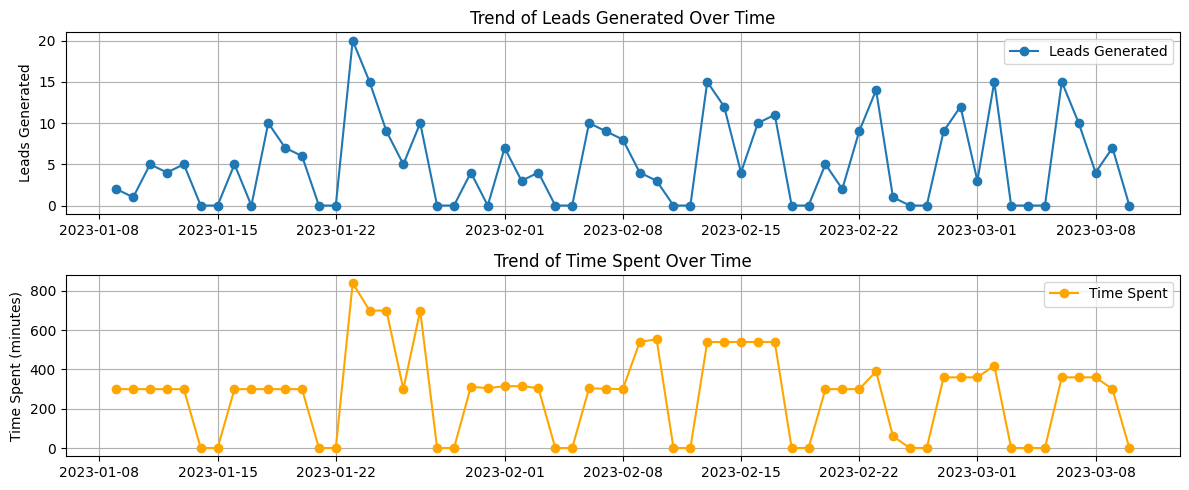

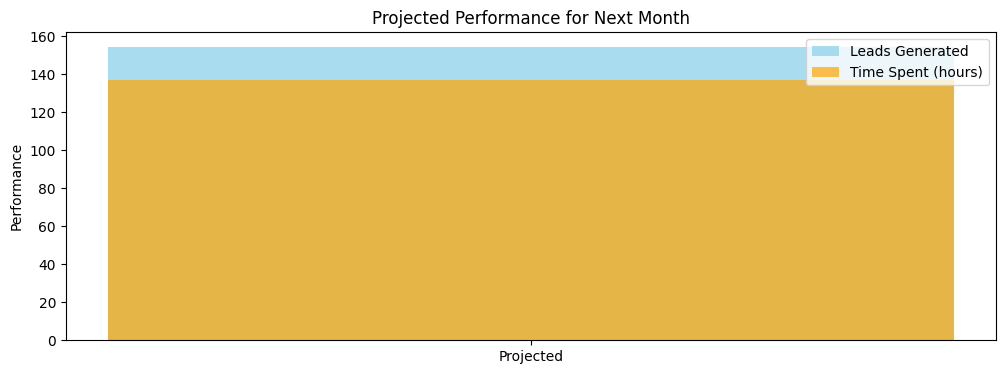

In [ ]:
# Convert "Date" to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Group data by date and calculate daily totals
daily_totals = data.groupby('Date').agg({'No of Leads': 'sum', 'Time Spent on LG (in mins)': 'sum'})

# Create line charts to visualize the trend
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(daily_totals.index, daily_totals['No of Leads'], label='Leads Generated', marker='o')
plt.title('Trend of Leads Generated Over Time')
plt.ylabel('Leads Generated')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_totals.index, daily_totals['Time Spent on LG (in mins)'], label='Time Spent', marker='o', color='orange')
plt.title('Trend of Time Spent Over Time')
plt.ylabel('Time Spent (minutes)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate daily average for leads generated and time spent
average_leads_per_day = daily_totals['No of Leads'].mean()
average_time_spent_per_day = daily_totals['Time Spent on LG (in mins)'].mean() / 60  # Convert minutes to hours

# Calculate tentative projections for the next month
next_month_date = daily_totals.index[-1] + timedelta(days=1)
next_month_projections = pd.DataFrame({
    'Date': [next_month_date],
    'Projected Leads Generated': [average_leads_per_day * 30],
    'Projected Time Spent (hours)': [average_time_spent_per_day * 30]
})

# Visualize projections
plt.figure(figsize=(12, 4))
plt.bar(['Projected'], [next_month_projections['Projected Leads Generated'].values[0]], label='Leads Generated', color='skyblue', alpha=0.7)
plt.bar(['Projected'], [next_month_projections['Projected Time Spent (hours)'].values[0]], label='Time Spent (hours)', color='orange', alpha=0.7)
plt.title('Projected Performance for Next Month')
plt.ylabel('Performance')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Bar chart projected performance for the next month. You can compare this to their historical performance.

Created line charts to visualize the trend in leads generated and time spent over time.

For tentative projections for the next month, used time series forecasting methods.Approach is to calculate the daily average leads generated and time spent for each employee over the dataset's duration and then use this average to make projections for the next month

# Recommendations for the Business Development Team to improve team performance:

1. Focus on High-Impact Days: **bold text**

Identify the days with the highest leads generated and time spent. Consider conducting more intensive lead generation activities on these days to maximize results.

**2. Training and Skill Development:**

Offer training and skill development programs to improve lead generation efficiency. Employees with higher conversion rates can serve as mentors or trainers.

**3. Performance Monitoring:**

Implement a performance monitoring system that tracks individual employee performance over time. Recognize and reward employees who consistently perform well.

**4. Regular Feedback and Coaching:**

Provide regular feedback and coaching to employees based on their performance data. Discuss areas for improvement and set targets.

**5. Optimize Time Allocation:**

Analyze the relationship between time spent and leads generated. Encourage employees to allocate their time more effectively, focusing on activities that yield better results.

**6. Identify Trends:**

Monitor the trends in performance over time and adapt strategies accordingly. For instance, if there is a seasonality pattern, plan for increased efforts during peak periods.

**7. Team Collaboration:**

Promote collaboration among team members. Sharing successful strategies and best practices can improve overall team performance.

**8. Set Clear Targets:**

Define specific, measurable targets for leads generated and time spent. These targets can serve as benchmarks for performance evaluation.

**9. Time Management Training:**

Offer time management training to help employees make the most of their work hours and maintain a better work-life balance.

**10. Regular Performance Reviews:**

Implement regular performance reviews to track employee progress and identify areas for improvement.

**11. Data-Driven Decision Making:**

Encourage employees to make data-driven decisions based on historical performance data and projections.

**12. Employee Empowerment:**

Empower employees to take ownership of their performance and set personal goals based on the data analysis.